In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statistics
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [ ]:
path = "/content/drive/MyDrive/CV_project_Grp1/mitbih_train.csv"
df = pd.read_csv(path,names=[f"Sample {i}" for i in range(1,188)]+['Class'])
df.head()

,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9,Sample 10,...,Sample 179,Sample 180,Sample 181,Sample 182,Sample 183,Sample 184,Sample 185,Sample 186,Sample 187,Class
0,0.9779,0.9265,0.6814,0.2451,0.1544,0.1912,0.1520,0.0858,0.0588,0.0490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.9601,0.8632,0.4615,0.1966,0.0940,0.1254,0.0997,0.0883,0.0741,0.0826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0000,0.6595,0.1865,0.0703,0.0703,0.0595,0.0568,0.0432,0.0541,0.0459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.9254,0.6657,0.5414,0.2762,0.1961,0.0773,0.0718,0.0608,0.0663,0.0580,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.9671,1.0000,0.8310,0.5869,0.3568,0.2488,0.1455,0.0892,0.1174,0.1502,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, Sample 1 to Class
dtypes: float64(188)
memory usage: 125.6 MB


In [ ]:
df['Class'].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: Class, dtype: int64

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

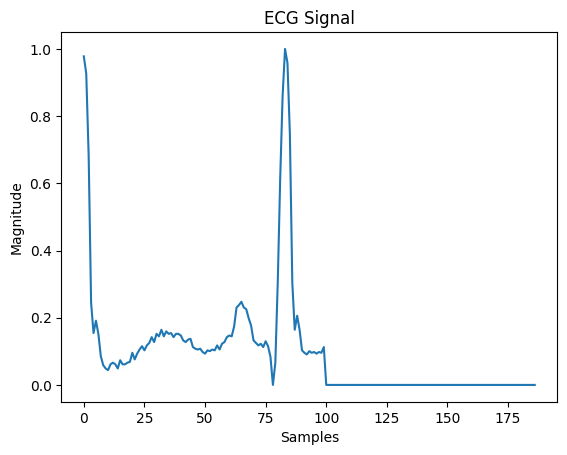

In [ ]:
plt.plot(range(len(X.loc[0])),X.loc[0])
plt.title("ECG Signal")
plt.xlabel("Samples")
plt.ylabel("Magnitude")
plt.show()

In [ ]:
samples = np.array(X)
mfccf = []
for s in samples:
    mfcc = librosa.feature.mfcc(y=s, sr=125, n_mfcc=20,n_fft=20)
    mfccf.append(mfcc.flatten())

/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


In [ ]:
mfccs = pd.DataFrame(mfccf)
mfccs.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-670.561467,8.264729,-14.045899,-2.841677,-14.462296,-1.080926,-15.576133,-1.632110,-15.639729,-1.781383,-16.479225,-1.916327,-17.733794,-2.074525,-20.526264,-1.795531,-24.404568,-4.824463,-39.062906,6.144207
1,-682.154684,7.574554,-15.482611,-1.648307,-14.992832,-1.330511,-15.220920,-1.732568,-15.549728,-1.890518,-16.320604,-2.035607,-17.628245,-2.206795,-20.044643,-2.204263,-24.741220,-3.619583,-40.799186,5.665882
2,-701.522627,5.542821,-16.839338,-0.872506,-15.328645,-1.186981,-15.474251,-1.328236,-15.943352,-1.417472,-16.762874,-1.522256,-18.091948,-1.673100,-20.415862,-1.888574,-25.240625,-2.374421,-42.960113,4.157331
3,-685.514779,6.221410,-13.513518,-1.412325,-15.269554,-1.440440,-15.525001,-1.259582,-16.065619,-1.372487,-16.855259,-1.469407,-18.247485,-1.554934,-20.559454,-2.086587,-25.445168,-3.043065,-39.025700,4.648173
4,-655.275860,8.712446,-12.938903,-1.528776,-15.047107,-1.773395,-15.030073,-2.076030,-15.228368,-2.191286,-16.083551,-2.351841,-17.267410,-2.613335,-19.760928,-2.846538,-24.797156,-3.862282,-37.482216,6.529256


In [ ]:
trainX, testX, trainY, testY = train_test_split(mfccs,y, random_state=0, test_size=0.2,stratify=y)

In [ ]:
stsc = StandardScaler()
trainX = stsc.fit_transform(trainX)
testX = stsc.transform(testX)

In [ ]:
trainX.shape

(70043, 20)

In [ ]:
trainX = np.array(trainX)
testX = np.array(testX)
trainY = np.array(trainY)
testY = np.array(testY)

In [ ]:
testX.shape

(17511, 20)

##Earlier versions of our KNN classifier


def KNNClassifer(k,trainX,trainY,testX):

    ypred = []
    dst = {}
    for tx in testX:
        for i,tr in enumerate(trainX):
          dist = (((tr-tx)**2).sum())**0.5
          dst[dist] = trainY[i]
      topk = dict(list(sorted(dct.items()))[:k])
      mode = statistics.mode(topk.values())
      ypred.append(mode)
    return ypred


def KNNClassifer(k,trainX,trainY,testX):

    ypred = []
    for tx in testX:
        dd = np.linalg.norm(trainX-tx,axis=1)
        dct = dict(zip(dd,trainY))
        topk = dict(list(sorted(dct.items()))[:k])
        mode = statistics.mode(topk.values())
        ypred.append(mode)
    return ypred

In [ ]:
def KNNClassifer(k, trainX, trainY, testX):
    ypred = []
    for tx in testX:
        dist = np.linalg.norm(trainX - tx, axis=1)
        indices = np.argpartition(dist, k)[:k]
        topk_classes = trainY[indices]
        mode = statistics.mode(topk_classes)
        ypred.append(mode)
    return ypred
ypred = KNNClassifer(5,trainX,trainY,testX)

In [ ]:
cm = confusion_matrix(testY, ypred)
acc = accuracy_score(testY, ypred)*100
f1 = f1_score(testY, ypred, average='weighted')*100
print("Confusion Matrix :")
print(cm)

Confusion Matrix :
[[14297    56   107    10    24]
 [  221   213     6     1     4]
 [  218     3   916     5    16]
 [   49     0    11    67     1]
 [   48     0     9     6  1223]]


In [ ]:
print(f"Accuracy = {acc:.2f}%")

Accuracy = 95.46%


In [ ]:
print(f"F1-Score = {f1:.2f}%")

F1-Score = 95.19%


K = 3
Accuracy = 95.26%
F1-Score = 95.00%
K = 5
Accuracy = 95.46%
F1-Score = 95.19%
K = 7
Accuracy = 95.49%
F1-Score = 95.19%
K = 9
Accuracy = 95.36%
F1-Score = 95.03%
K = 11
Accuracy = 95.28%
F1-Score = 94.93%
K = 13
Accuracy = 95.19%
F1-Score = 94.83%


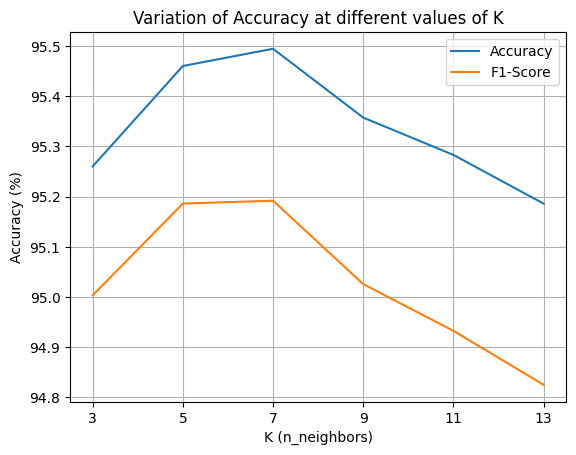

In [ ]:
accs,f1s = [],[]
kv = [3,5,7,9,11,13]
for k in kv:
  print("K =",k)
  yprd = KNNClassifer(k,trainX,trainY,testX)
  acc = accuracy_score(testY, yprd)*100
  accs.append(acc)
  f1 = f1_score(testY, yprd, average='weighted')*100
  f1s.append(f1)
  print(f"Accuracy = {acc:.2f}%")
  print(f"F1-Score = {f1:.2f}%")
plt.plot(kv,accs,label="Accuracy")
plt.plot(kv,f1s,label="F1-Score")
plt.legend()
plt.xlabel("K (n_neighbors)")
plt.ylabel("Accuracy (%)")
plt.title("Variation of Accuracy at different values of K")
plt.xticks(kv)
plt.grid()
plt.show()

In [ ]:
ypred2=KNNClassifer(7,trainX,trainY,testX)
acc2 = accuracy_score(testY, ypred2)*100
f12 = f1_score(testY, ypred2, average='weighted')*100
cm2 = confusion_matrix(testY, ypred2)
print("Confusion Matrix :")
print(cm2)
print(f"Accuracy = {acc2:.2f}%")
print(f"F1-Score = {f12:.2f}%\n")

Confusion Matrix :
[[14318    50    92     9    25]
 [  221   211     7     1     5]
 [  225     2   910     5    16]
 [   50     0    16    61     1]
 [   52     0     7     5  1222]]
Accuracy = 95.49%
F1-Score = 95.19%

